In [1]:
from datetime import datetime
import pytz
import matplotlib.pyplot as plt
%matplotlib inline

def parse_str(x):

    return x[1:-1]

def parse_datetime(x):
    '''
    Parses datetime with timezone formatted as:
        `[day/month/year:hour:minute:second zone]`

    Example:
        `>>> parse_datetime('13/Nov/2015:11:45:42 +0000')`
        `datetime.datetime(2015, 11, 3, 11, 45, 4, tzinfo=<UTC>)`

    Due to problems parsing the timezone (`%z`) with `datetime.strptime`, the 
    timezone will be obtained using the `pytz` library.
    '''    
    dt = datetime.strptime(x[1:-7], '%d/%b/%Y:%H:%M:%S')
    dt_tz = int(x[-6:-3])*60+int(x[-3:-1])    
    return dt.replace(tzinfo=pytz.FixedOffset(dt_tz))





In [2]:
import re
import pandas as pd

data = pd.read_csv('access.txt',
                   sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
                   engine='python', 
                   na_values='-', 
                   header=None,
                       usecols=[0, 3, 4, 5, 6, 7, 8],
                   names=['ip', 'time', 'request', 'status', 'size', 'referer', 'user_agent'],
                   converters={'time': parse_datetime,
                               'request': parse_str,
                               'status': int,
                               'size': int,
                               'referer': parse_str,
                               'user_agent': parse_str})
data.head()

,ip,time,request,status,size,referer,user_agent
0,172.16.32.60,2018-05-07 03:28:09-03:00,GET /,403,3539,NaN,NaN
1,172.16.32.61,2018-05-07 03:28:11-03:00,GET /,403,3539,NaN,NaN
2,172.16.32.60,2018-05-07 03:28:14-03:00,GET /,403,3539,NaN,NaN
3,172.16.32.61,2018-05-07 03:28:16-03:00,GET /,403,3539,NaN,NaN
4,172.16.32.60,2018-05-07 03:28:19-03:00,GET /,403,3539,NaN,NaN


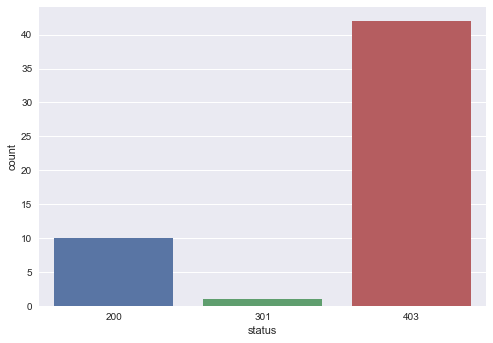

In [4]:
import seaborn as sns
sns.countplot(data['status'])

In [8]:
data['status'].describe()

count     53.000000
mean     362.773585
std       80.471123
min      200.000000
25%      403.000000
50%      403.000000
75%      403.000000
max      403.000000
Name: status, dtype: float64

In [18]:
df = data.copy()


df.index = data['status']
df
df.ix['200']

C:\Users\Inmetrics\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  


KeyError: '200'